# Showwcase User Engagement Analysis

In this notebook, I will attempt to analyse the user engagements of Showwcase. 
Let’s get started.

## Import the packages that we need


In [1]:
# First, let's get the imports that we will be using
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# packages for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\miniconda3\envs\PythonCPU\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 1. Data preprocessing
# 1.1 - Loading the dataset
## Now, let's get an idea of what the data looks like. I will check the top 5 rows


In [2]:
df = pd.read_csv("showwcase_sessions.csv")
print(df.head())

   session_id  customer_id login_date projects_added likes_given  \
0    624205.0      80746.0   10/30/19          False        True   
1    624241.0      24520.0   10/30/19           True        True   
2    111002.0      32047.0   10/30/19           True        True   
3    545113.0      23404.0   10/30/19           True        True   
4    750269.0      40235.0   10/30/19           True        True   

  comment_given inactive_status bug_occured  session_projects_added  \
0          True            True       False                     0.0   
1          True            True       False                     2.0   
2          True            True       False                     1.0   
3          True           False       False                     1.0   
4         False            True       False                     3.0   

   session_likes_given  session_comments_given  inactive_duration  \
0                 24.0                     3.0             1146.0   
1                  3.0    

In [3]:
# inspect the file information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

In [4]:
# we can see that there is a missing value for session_likes_given as there are 299 data rows instead of 300
df.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


## 1.2 - Cleaning up the Data
First, I'll check if there is any null values. I found out that there are 3 null values in the dataset so I'd remove 2 of them and impute the other missing value with the mean value


In [5]:
# check for null values
df.isnull().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

In [6]:
# Check the rows that has the null values 
df[df.isnull().any(axis=1)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Seems like the bottom two rows are all null values and serves no meaning, this may also due to data integrity problem
df.drop(df.tail(2).index,inplace=True)

In [8]:
# Now, I'd like to inspect rows that has the same customer id as row 35, the row with missing value for session_likes_given
target_df = df.loc[df['customer_id'] == df['customer_id'][35]]
target_df

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
9,919319.0,23404.0,10/29/19,True,True,False,True,False,2.0,14.0,0.0,2031.0,0.0,1957.0
31,339866.0,23404.0,10/27/19,False,False,True,True,True,0.0,0.0,1.0,1919.0,5.0,613.0
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
41,418108.0,23404.0,10/26/19,True,True,False,False,False,1.0,2.0,0.0,0.0,0.0,1508.0
51,504793.0,23404.0,10/26/19,True,True,False,False,True,3.0,27.0,0.0,0.0,5.0,1778.0
82,810798.0,23404.0,10/22/19,True,True,False,True,True,2.0,11.0,0.0,2274.0,4.0,269.0
89,279710.0,23404.0,10/21/19,True,True,True,False,False,2.0,9.0,3.0,0.0,0.0,1374.0
96,676493.0,23404.0,10/21/19,True,True,True,True,False,1.0,19.0,5.0,1732.0,0.0,1487.0
123,638118.0,23404.0,10/19/19,True,False,True,False,False,2.0,0.0,4.0,0.0,0.0,899.0


In [9]:
# I decided to replace the missing value with mean since apparently the same customer has logged in
# several times and has values for the 'session_likes_given' column
df = df.fillna(round(target_df["session_likes_given"].mean(), 0))

In [10]:
# Re-check for null values
df.isnull().sum()

session_id                0
customer_id               0
login_date                0
projects_added            0
likes_given               0
comment_given             0
inactive_status           0
bug_occured               0
session_projects_added    0
session_likes_given       0
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

# Part 2. Measuring user engagement
## 2.1 - Measure user engagement at different times

Since we are trying to measure user engagement, I think it's important to look into the specific time when
the users are active or inactive, because if we can identify the specific time that the users are active, then we can work on marketing strategy accordingly. Hence I am create other features based on date, which are:
1. Day of the week
2. Check if the day is weekend or not
3. Check if it's a holiday


In [11]:
df['login_date'] = pd.to_datetime(df.login_date)
df['day_of_week'] = df['login_date'].dt.day_name()
df['Weekends'] = ((pd.DatetimeIndex(df.login_date).dayofweek) // 5 == 1).astype(float)

cal = calendar()
holidays = cal.holidays(start=df.login_date.min(), end=df.login_date.max())
df['Holiday'] = df['login_date'].isin(holidays)

In [12]:
# Get the counts of user logins depending on the time
plot_date = df[['customer_id', 'login_date']].groupby('login_date', as_index=False).count()
plot_dayofweek = df[['customer_id', 'day_of_week']].groupby('day_of_week', as_index=False).count()
plot_weekend = df[['customer_id', 'Weekends']].groupby('Weekends', as_index=False).count()
plot_holiday = df[['customer_id', 'Holiday']].groupby('Holiday', as_index=False).count()

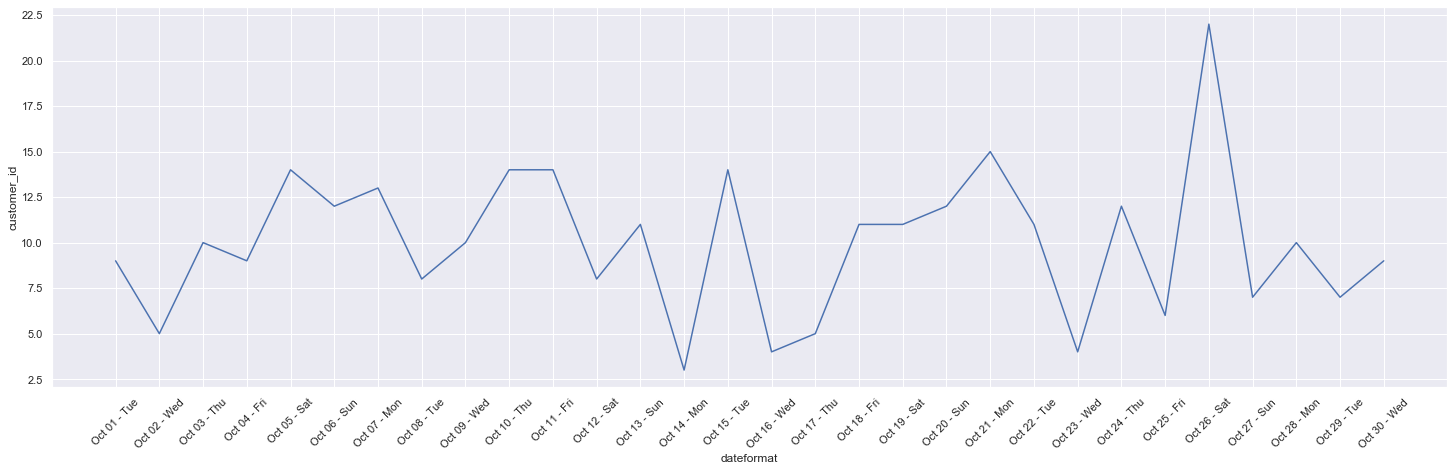

In [13]:
# Plot date vs count of customer_id
plot_date['dateformat'] = plot_date.apply(lambda x: x['login_date'].strftime("%b %d - %a"), axis=1)

sns.set(rc={'figure.figsize':(25,7)})
axdate = sns.lineplot(x='dateformat', y='customer_id', data=plot_date, sort=False)
for item in axdate.get_xticklabels():
    item.set_rotation(90)

plt.xticks(rotation=45)
plt.show()

In [14]:
# I will also measure DAU: The number of active users (uniques) who use the app on a daily basis.
engagement_metrics = df[['customer_id','login_date']].drop_duplicates().groupby('login_date', as_index=False).count().\
    sort_values('login_date',ascending=True)
engagement_metrics = engagement_metrics.rename(columns={"login_date": "login_date", "customer_id": "DAU"})

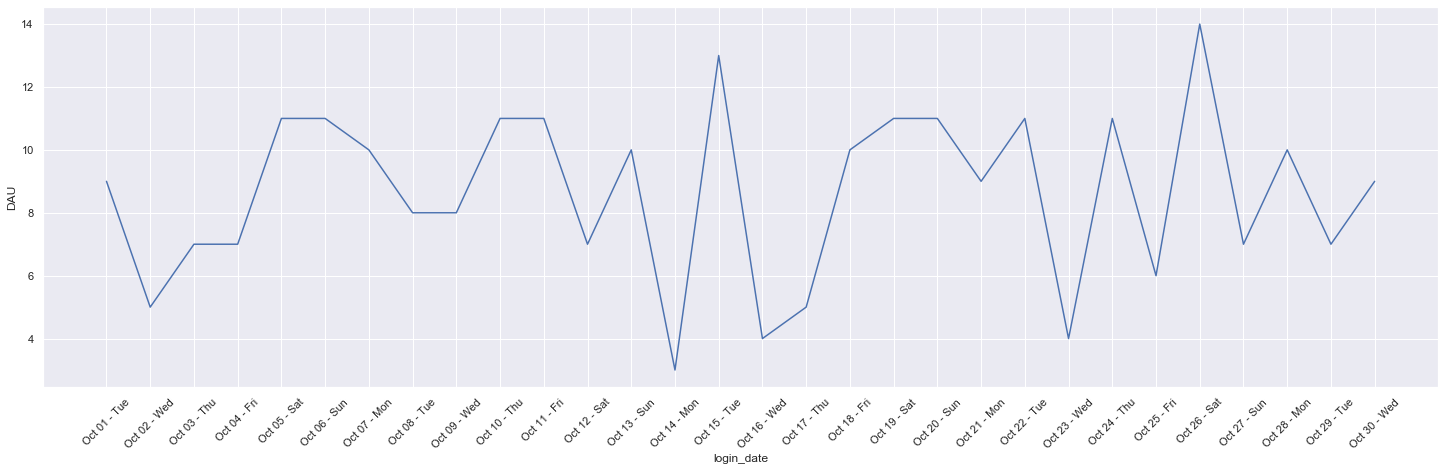

In [15]:
# DAU vs date
engagement_metrics['login_date'] = engagement_metrics.apply(lambda x: x['login_date'].strftime("%b %d - %a"), axis=1)

sns.set(rc={'figure.figsize':(25,7)})
axdau = sns.lineplot(x='login_date', y="DAU", data=engagement_metrics, sort=False)
for item in axdau.get_xticklabels():
    item.set_rotation(90)

plt.xticks(rotation=45)
plt.show()

From the plot, it seems that there's a huge spike of customer logins on Oct 26, that is something we can look into to see what induced that. In general, number of customer logins are also generally low on Wednesdays as seen from the graph

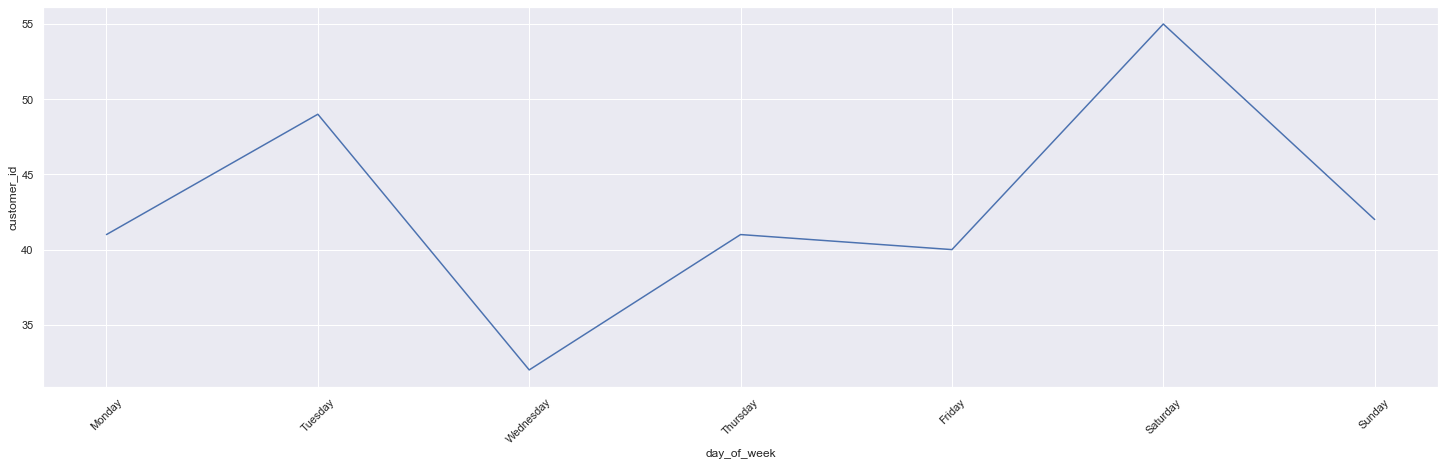

In [16]:
# Plot day of week vs count of customer_id
plot_dayofweek['weekdayn'] = plot_dayofweek['day_of_week'].map({'Monday':0,'Tuesday':1, 'Wednesday':2,'Thursday':3, 'Friday':4,'Saturday':5, 'Sunday':6})
plotweekday = plot_dayofweek.sort_values('weekdayn', ascending=True)

sns.set(rc={'figure.figsize':(25,7)})
axdate = sns.lineplot(x='day_of_week', y='customer_id', data=plotweekday, sort=False)
for item in axdate.get_xticklabels():
    item.set_rotation(90)

plt.xticks(rotation=45)
plt.show()

Now we can see that it is true that the user engagement is lowest on Wednesdays, while highest on Saturdays. Next, I will measure the total number of customer logins and the unique customer logins as there are customers who re-logged in

In [17]:
print("Unique number of customers: {}".format(len(df['customer_id'].unique())))
print("All customers count: {}".format(len(df['customer_id'])))

Unique number of customers: 48
All customers count: 300


This means that on average, each user would visit Showwcase about 6 times per month
Now, I will inspect the number of logins during weekends vs non-weekends 


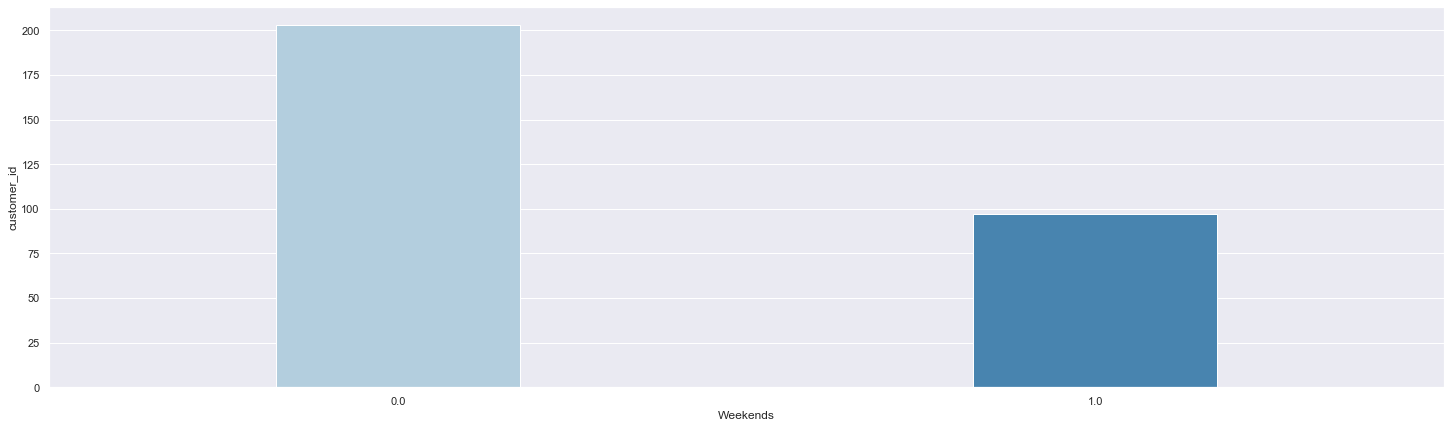

In [18]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


fig, ax = plt.subplots()
sns.barplot(x='Weekends', y='customer_id', data=plot_weekend,
            palette='Blues', edgecolor='w')

change_width(ax, .35)
plt.show()

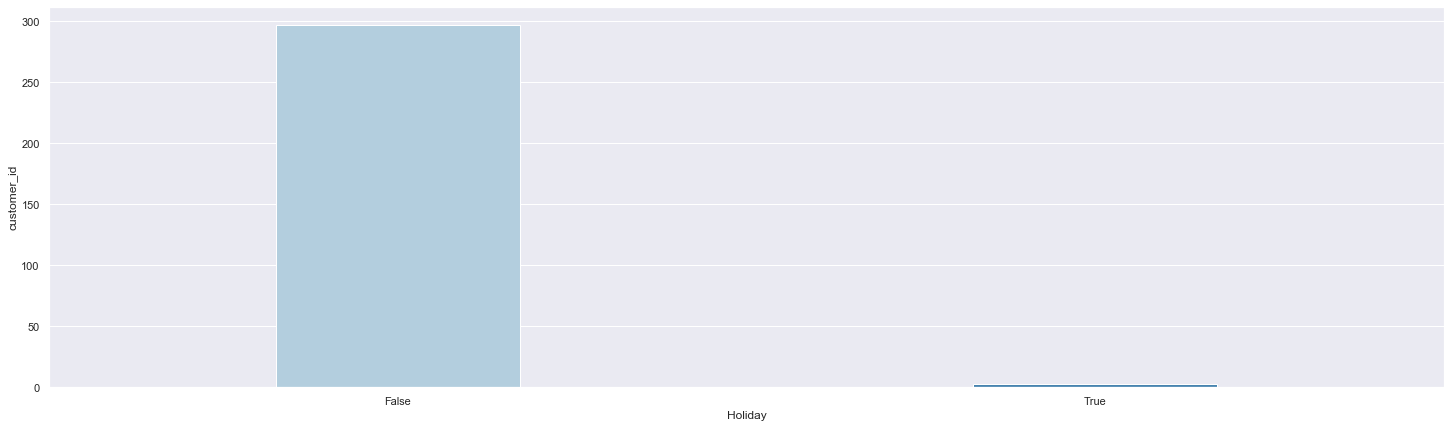

In [19]:
# Check if holiday affects customer logins
fig, ax = plt.subplots()
sns.barplot(x='Holiday', y='customer_id', data=plot_holiday,
            palette='Blues', edgecolor='w')

change_width(ax, .35)
plt.show()

## 2.2 Measuring User Engagement with the platform and content (i.e. likes, comments etc.)
Measuring the number of likes and comments per user is crucial to determine if the users are familiar with the platform and actively engaging with other users and the platform's contents.

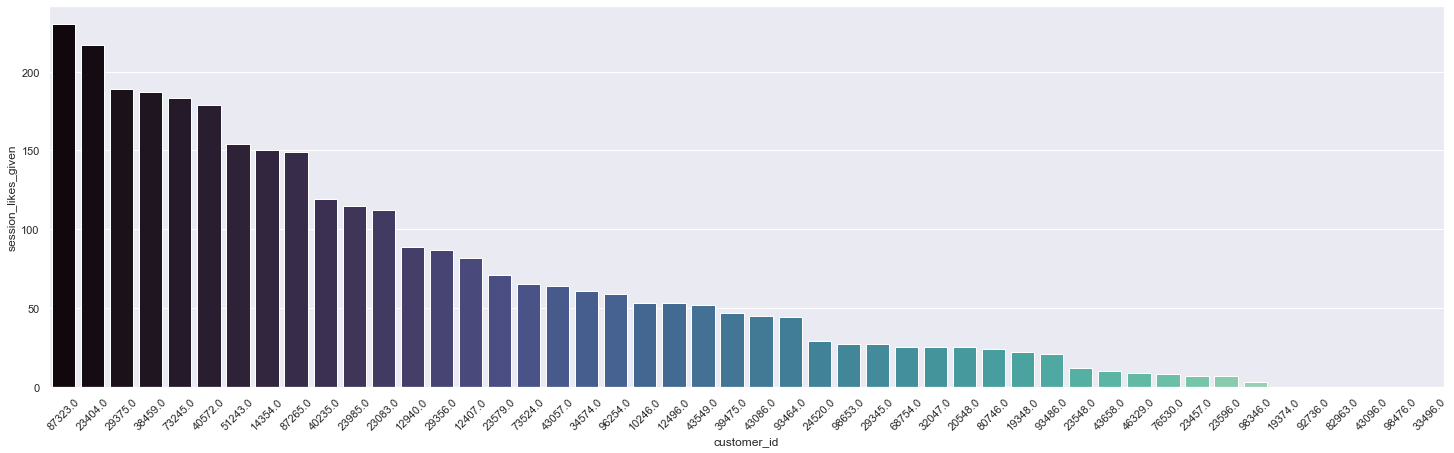

In [20]:
# Check number of likes
num_likes_users = df.groupby(['customer_id'])['session_likes_given'].sum().reset_index()

fig, ax = plt.subplots()
sns.barplot(x='customer_id', y='session_likes_given', data=num_likes_users, order=num_likes_users.sort_values('session_likes_given', ascending=False).customer_id,
            palette='mako', edgecolor='w')

# change_width(ax, .35)
plt.xticks(rotation=45)
plt.show()

We can see that most users at least gave some likes while using Showwcase with only tiny portion of them who did not give any likes

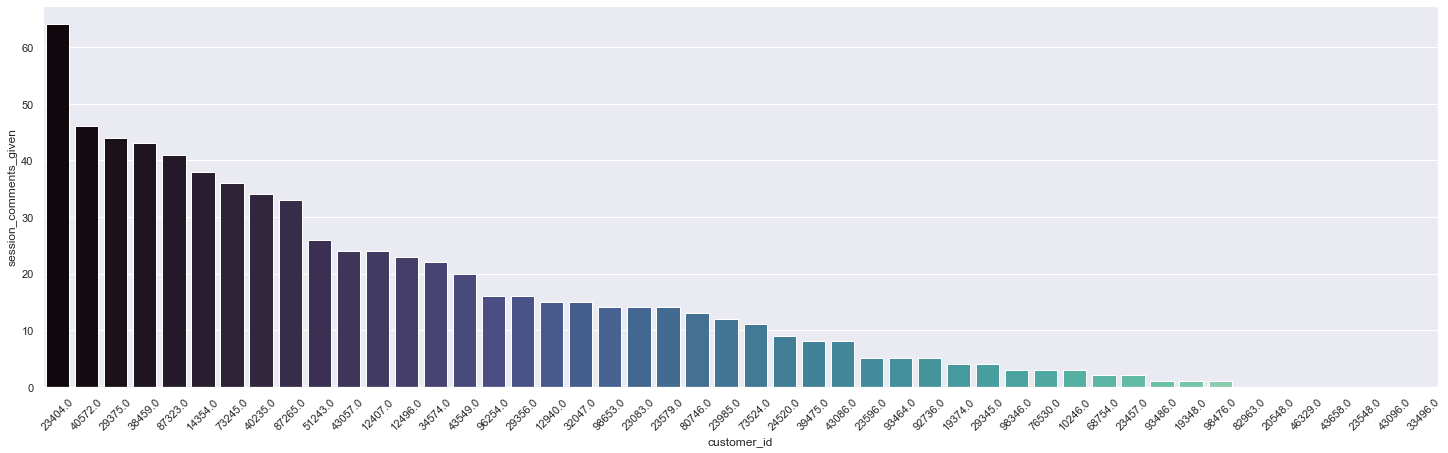

In [21]:
# Next, I can check if the users are engaging with the content by commenting
num_comments_given = df.groupby(['customer_id'])['session_comments_given'].sum().reset_index()

fig, ax = plt.subplots()
sns.barplot(x='customer_id', y='session_comments_given', data=num_comments_given, order=num_comments_given.sort_values('session_comments_given', ascending=False).customer_id,
            palette='mako', edgecolor='w')

# change_width(ax, .35)
plt.xticks(rotation=45)
plt.show()

A similar pattern can be oserved, most customers commented at least once while using Showwcase. How about inactive time spent on Showwcase for each user? 

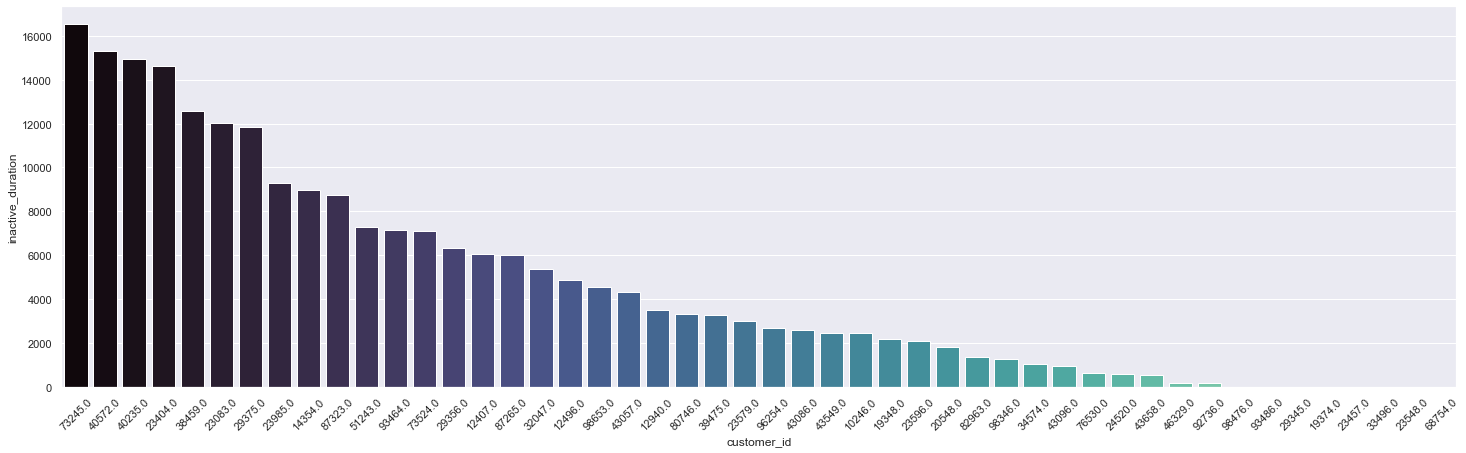

In [22]:
inactive_time_user = df.groupby(['customer_id'])['inactive_duration'].sum().reset_index()

fig, ax = plt.subplots()
sns.barplot(x='customer_id', y='inactive_duration', data=inactive_time_user, order=inactive_time_user.sort_values('inactive_duration', ascending=False).customer_id,
            palette='mako', edgecolor='w')

# change_width(ax, .35)
plt.xticks(rotation=45)
plt.show()

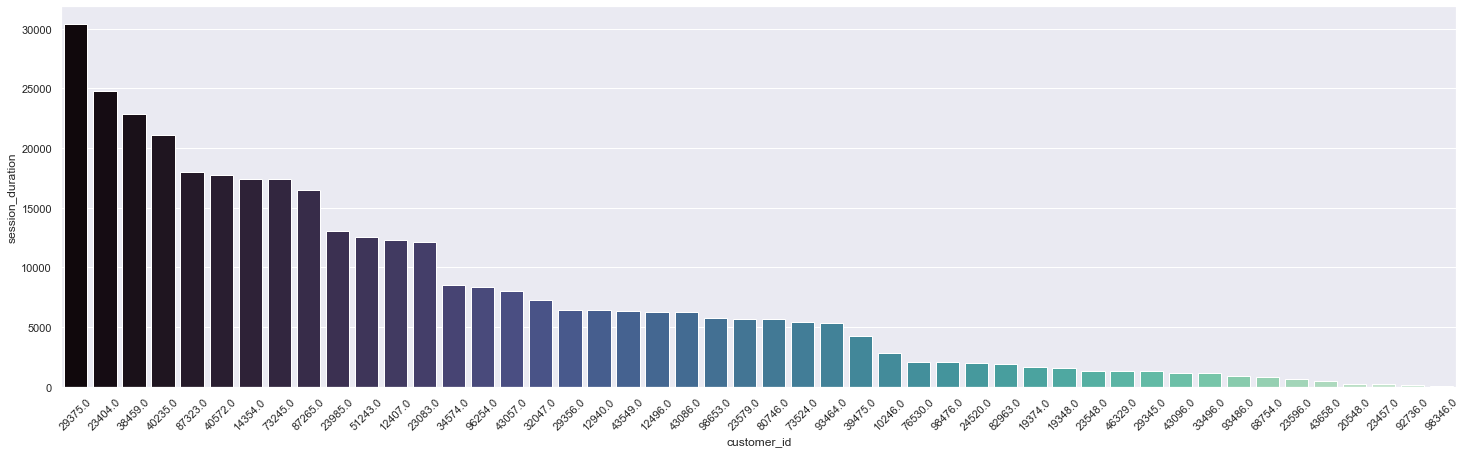

In [23]:
# Now, I will check the total time each customer spent in October 2019, I am assuming that total time = inactive time + active time
total_sess_user = df.groupby(['customer_id'])['session_duration'].sum().reset_index()

fig, ax = plt.subplots()
sns.barplot(x='customer_id', y='session_duration', data=total_sess_user, order=total_sess_user.sort_values('session_duration', ascending=False).customer_id,
            palette='mako', edgecolor='w')

plt.xticks(rotation=45)
plt.show()

To get an idea of the length of active times for each customer, I can subtract total time with the inactive time


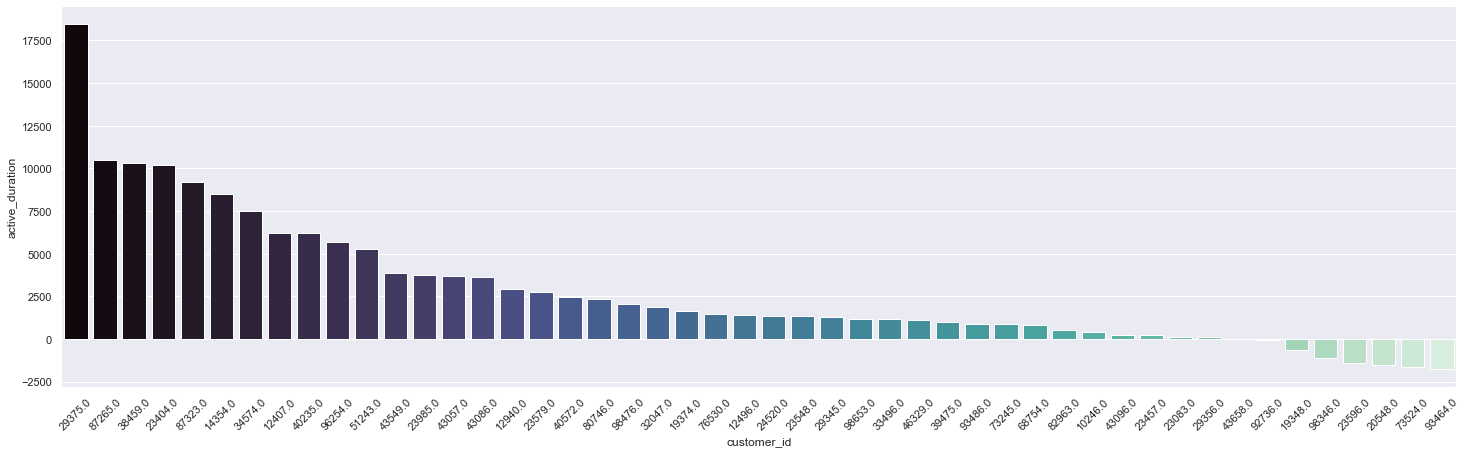

In [24]:
active_sess = pd.DataFrame({"active_duration": total_sess_user['session_duration'] - inactive_time_user['inactive_duration']})

uniq_id = pd.DataFrame(total_sess_user['customer_id'])
active_sess_user = pd.concat([uniq_id, active_sess], axis=1)

fig, ax = plt.subplots()
sns.barplot(x='customer_id', y='active_duration', data=active_sess_user, order=active_sess_user.sort_values('active_duration', ascending=False).customer_id,
            palette='mako', edgecolor='w')

plt.xticks(rotation=45)
plt.show()

Notice that there are several negative values for "active time spent for each customer". In fact, they should be all positve values, so there might be an error in terms of how the current system measures the inactive time and total time for each customer

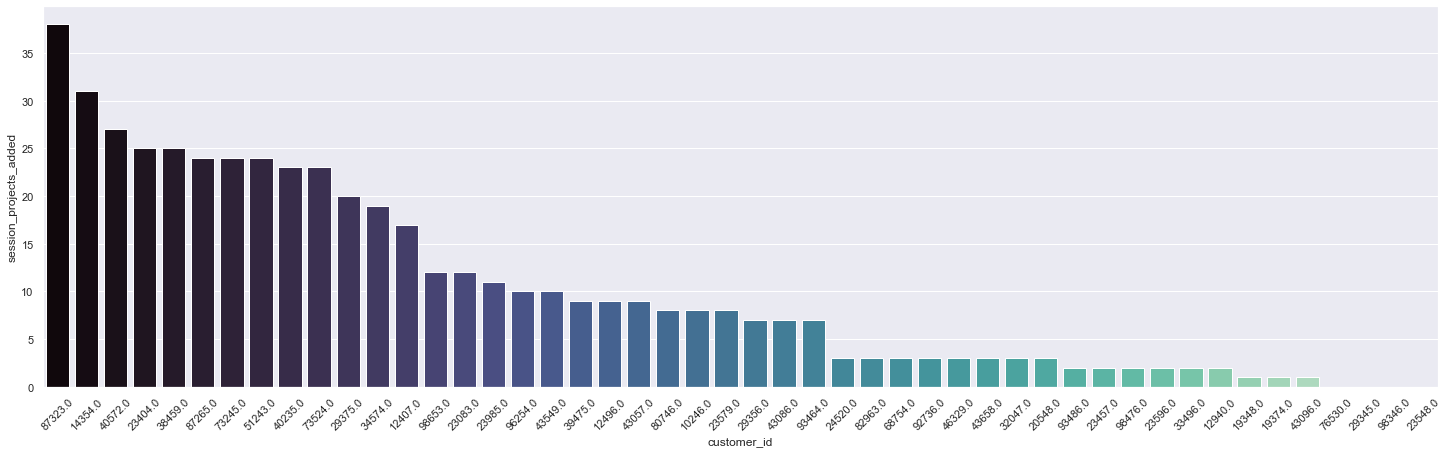

In [25]:
# Measure number of projects uploaded per customer
num_project_users = df.groupby(['customer_id'])['session_projects_added'].sum().reset_index()
len(num_project_users['customer_id'])

fig, ax = plt.subplots()
sns.barplot(x='customer_id', y='session_projects_added', data=num_project_users, order=num_project_users.sort_values('session_projects_added', ascending=False).customer_id,
            palette='mako', edgecolor='w')

# change_width(ax, .35)
plt.xticks(rotation=45)
plt.show()

## 2.3 - Measuring number of bugs encountered per user
For the final criteria, I am going to measure number of bugs encountered by each user eventhough it may not be 
related to user engagement, but it's important for user experience

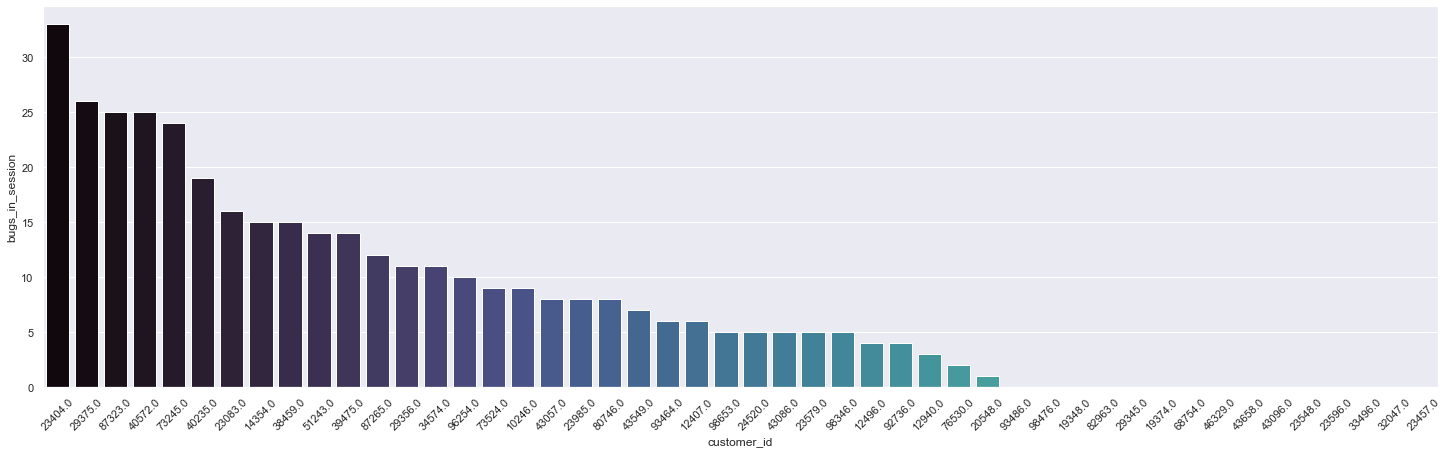

In [26]:
num_bugs_user = df.groupby(['customer_id'])['bugs_in_session'].sum().reset_index()

fig, ax = plt.subplots()
sns.barplot(x='customer_id', y='bugs_in_session', data=num_bugs_user, order=num_bugs_user.sort_values('bugs_in_session', ascending=False).customer_id,
            palette='mako', edgecolor='w')

plt.xticks(rotation=45)
plt.show()

In [27]:
percent_user_bugs = len(num_bugs_user[num_bugs_user['bugs_in_session'] != 0])/len(num_bugs_user) * 100
print("Percentage of customers who encountered at least one bug is", percent_user_bugs)

Percentage of customers who encountered at least one bug is 68.75


# 2.4 - Correlation Map


Since we have the data on number of logins per user, we can measure the correlation between different features and the customer logins to see if there is a relationship

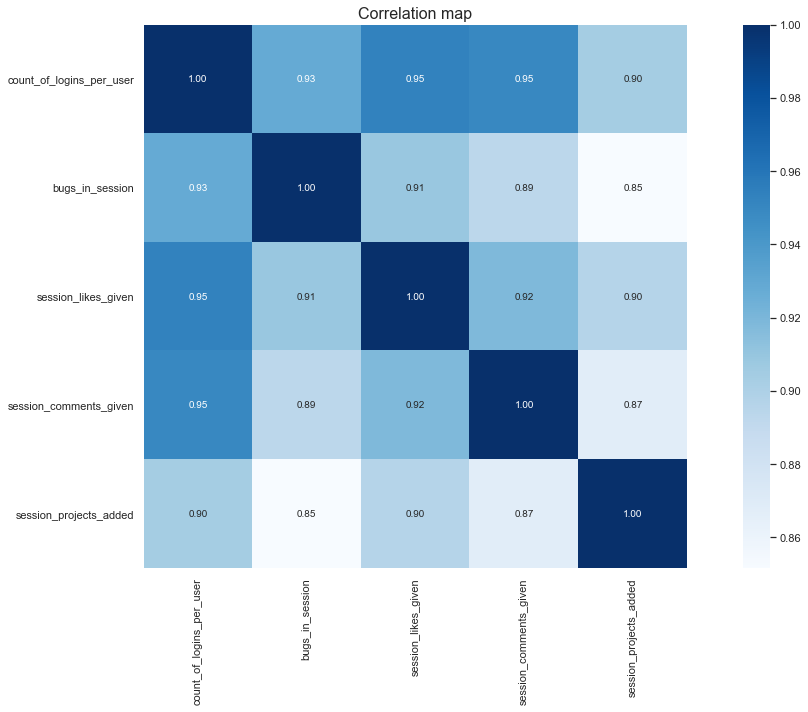

In [28]:
visits_per_user = df['customer_id'].value_counts()
visits_per_user = visits_per_user.to_frame(name="count_of_logins_per_user").reset_index()
visits_per_user = visits_per_user.rename(columns={"index": "customer_id"})

df_merge_col = pd.merge(visits_per_user, num_bugs_user, on='customer_id')
df_merge_col = pd.merge(df_merge_col, num_likes_users, on='customer_id')
df_merge_col = pd.merge(df_merge_col, num_comments_given, on='customer_id')
df_merge_col = pd.merge(df_merge_col, num_project_users, on='customer_id')
df_merge_col = df_merge_col.drop(['customer_id'], axis = 1)


# Compute correlation matrix.
corrmatrix = df_merge_col.corr()

# Reset size.
plt.rcParams['figure.figsize'] = (20, 10)

# Plot a heatmap.
hm = sns.heatmap(corrmatrix, square = True, annot = True, cmap = 'Blues', fmt = '.2f', annot_kws = {'size':10})
sns.set(font_scale = 1.25)

plt.title("Correlation map", fontsize = 16)
plt.show()

From the correlation map, we can see that there is a strong correlation between the number of logins per user and the number of likes and comments given per user. That makes sense as the more frequent a user visits Showwcase, the more likely the user is going to respond to the content.

However, one thing to take note is that there is a strong correlation between the number of logins per user and the number of bugs encountered by each user. This means that as the number of logins increases, the number of bugs encountered increases as well, which may not be a good prospect in the long run as users may be discouraged to use the platform.

# Part 3. Conclusion
## Discovered Insights

1. In general, the number of customer logins is the lowest on Wednesdays and highest on Saturdays
2. Holidays does not seem to have a huge impact on customer logins, but weekends do (Saturdays logins are the highest)
3. There are a total of 298 logins, with 48 unique customer ids
4. Most customers posted projects and have given likes or comments, which is a positive sign that they are
   engaging with one another
5. There might be data integrity issues as there are negative values for active time spent per user (Assuming total
duration = inactive duration + active duration). If active time spent per user is provided, we would be able to divide the users into different segments, i.e. low, middle or high active levels and measure correlation between them and the features, i.e. number of likes, projects etc.
6. There's a substantial amount of people (68.75 %) who had faced at least a bug while using Showwcase



## Suggestions to improve the result

1. Small data sample

More data can be collected for data analysis. With larger sample data across wider date range, it'd be helpful to calculate Weekly Active User (WAU), Monthly Active User (MAU), product stickiness and customer retention

2. Collecting other data/ feature variables from the user

There are other metrics that can measured for each user and would be helpful for further analysis:
* "login_date" to include timestamp, so we can use this to analyse the peak hours of customer usage.
* "date_account_first_created” data to calculate the retention rate of customer
* "number_of_followers_per_user" and "number_of_following_per_user"


3. Solving the bugs

It is important to identify the bugs faced by the user and rectify them. Having less bugs would ensure better user experience, and thus encouraging more users to sign up on this platform.

## Future works

For future works to improve the project, my suggestions are as follows:

* Collecting more data and include additional features to paint a bigger picture of the features that may correlate with the user engagement
* Apply ridge regression, elastic nets and recursive feature elimination to identidy the important features 
* Conduct A/B testing during implementation of new features of the platform, for instance, sharing projects or links from Showwcase (to my understanding, there is no sharing function just yet)